In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
from torch.autograd import Variable
from torch import nn
from torch.nn import init

import torch.utils.data as Data
import torch.nn.functional as F
%matplotlib inline

In [2]:
torch.manual_seed(1)
np.random.seed(1)

In [3]:
# Hyper parameters
N_SAMPELS = 2000
BATCH_SIZE = 64
EPOCH = 12
LEARNING_RATE = 0.01
N_HIDDEN = 8
ACTIVATION = F.tanh
B_INIT = -0.2

In [23]:
# Training data
x = np.linspace(-7, 10, N_SAMPELS)[:, np.newaxis]
# (2000,) -> (2000, 1)
noise = np.random.normal(0, 2, x.shape)
y = np.square(x) - 5 + noise

In [24]:
# Test data
test_x = np.linspace(-7, 10, 200)[:, np.newaxis]
noise = np.random.normal(0, 2, test_x.shape)
test_y = np.square(test_x) - 5 + noise

In [25]:
train_x, train_y = torch.from_numpy(x).float(), torch.from_numpy(y).float()
test_x, test_y = torch.from_numpy(test_x).float(), torch.from_numpy(test_y).float()

In [28]:
train_dataset = Data.TensorDataset(train_x, train_y)
train_loader = Data.DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=120)

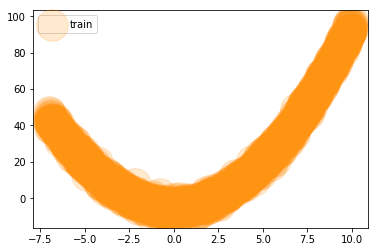

In [35]:
# Show data
plt.scatter(train_x.numpy(), train_y.numpy(), c='#FF9312', s=1000, alpha=0.2, label='train')
plt.legend(loc='upper left')